In [1]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

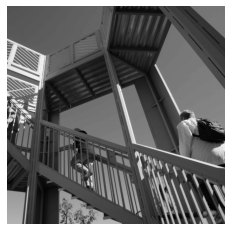

In [3]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [5]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [6]:
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight  = 1

In [7]:
i

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [10]:
for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (i[x-1, y-1] * filter[0][0])
        convolution = convolution + (i[x-1, y] * filter[0][1])  
        convolution = convolution + (i[x-1, y+1] * filter[0][2])     
        convolution = convolution + (i[x, y-1] * filter[1][0])    
        convolution = convolution + (i[x, y] * filter[1][1])    
        convolution = convolution + (i[x, y+1] * filter[1][2])    
        convolution = convolution + (i[x+1, y-1] * filter[2][0])    
        convolution = convolution + (i[x+1, y] * filter[2][1])    
        convolution = convolution + (i[x+1, y+1] * filter[2][2])    
        convolution = convolution * weight   
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255
        i_transformed[x, y] = convolution

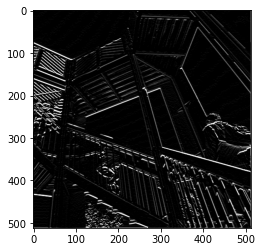

In [11]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

In [12]:
range(0, size_x, 2)

range(0, 512, 2)

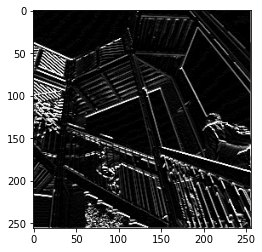

In [13]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])
        newImage[int(x/2), int(y/2)] = max(pixels)
        
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()